In [170]:
##Standard mtable
import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
orgdata={'energy':[],'transmit':[],"emit":[],'density':[],'column':[],"logxi":[]}

HDdata={'energy':[],'transmit':[],"emit":[],'density':[],'column':[],"logxi":[]}

HDCLdata={'energy':[],'transmit':[],"emit":[],'density':[],'column':[],"logxi":[]}

dselect=np.array(["20","22"])
cselect=np.array(["1.E+22","1.E+23","1.E+24"])
xselect=np.array(["1","2","3"])
energyHDCL=[]
#emit_out=[]
transmitHDCL=[]
energyHD=[]
transmitHD=[]
norm=1e-1
# Energies
AllModels.setEnergies("0.001 10. 1000 log")
Xset.chatter = 0
Plot.xAxis = "keV"
for i,dense in enumerate(dselect):
    for j,column in enumerate(cselect):
        for k,logxi in enumerate(xselect):
            # Define the Model
            m1 = Model("pow*mtable{/disk/bifrost/yuanze/xstar_tab/stable/xstar_comp/n%s_cfrac0/xout_mtable.fits}"%dense)

            m1(1).values = "2.0"      # powerlaw   PhoIndex
            m1(2).values = norm     # powerlaw   norm
            m1(3).values = column   # template   column
            m1(4).values = logxi      # template   rlogxi
            m1(5).values = "0.0"      # template   z
            Plot("eemodel")
            HDCLdata['energy'].append(Plot.x())
            HDCLdata['transmit'].append(Plot.model())
            HDCLdata['density'].append(dense)
            HDCLdata['column'].append(column)
            HDCLdata['logxi'].append(logxi)
            AllModels.clear()
            m1 = Model("atable{/disk/bifrost/yuanze/xstar_tab/stable/xstar_comp/n%s_cfrac0/xout_aout.fits}"%dense)
            m1(1).values = column   # template   column
            m1(2).values = logxi      # template   rlogxi
            m1(3).values = "0.0"      # template   z
            m1(3).values = norm      # template   norm
            Plot("eemodel")
            HDCLdata['emit'].append(Plot.model())
            AllModels.clear()

            m1 = Model("pow*mtable{/disk/bifrost/yuanze/xstar_tab/stable/xstar_comp/n%s_cfrac0_withrex/xout_mtable.fits}"%dense)

            m1(1).values = "2.0"      # powerlaw   PhoIndex
            m1(2).values = norm      # powerlaw   norm
            m1(3).values = column   # template   column
            m1(4).values = logxi      # template   rlogxi
            m1(5).values = "0.0"      # template   z
            Plot("eemodel")
            HDdata['energy'].append(Plot.x())
            HDdata['transmit'].append(Plot.model())
            HDdata['density'].append(dense)
            HDdata['column'].append(column)
            HDdata['logxi'].append(logxi)
            AllModels.clear()
            m1 = Model("atable{/disk/bifrost/yuanze/xstar_tab/stable/xstar_comp/n%s_cfrac0_withrex/xout_aout.fits}"%dense)
            m1(1).values = column   # template   column
            m1(2).values = logxi      # template   rlogxi
            m1(3).values = "0.0"      # template   z
            m1(3).values = norm*0.001      # template   norm
            Plot("eemodel")
            HDdata['emit'].append(Plot.model())
            AllModels.clear()
            
            m1 = Model("pow*mtable{/disk/bifrost/yuanze/xstar_tab/stable/xstar_comp/n%s_cfrac0_atdb12/xout_mtable.fits}"%dense)

            m1(1).values = "2.0"      # powerlaw   PhoIndex
            m1(2).values = norm      # powerlaw   norm
            m1(3).values = column   # template   column
            m1(4).values = logxi      # template   rlogxi
            m1(5).values = "0.0"      # template   z
            Plot("eemodel")
            orgdata['energy'].append(Plot.x())
            orgdata['transmit'].append(Plot.model())
            orgdata['density'].append(dense)
            orgdata['column'].append(column)
            orgdata['logxi'].append(logxi)
            AllModels.clear()
            m1 = Model("atable{/disk/bifrost/yuanze/xstar_tab/stable/xstar_comp/n%s_cfrac0_atdb12/xout_aout.fits}"%dense)
            m1(1).values = column   # template   column
            m1(2).values = logxi      # template   rlogxi
            m1(3).values = "0.0"      # template   z
            m1(3).values = norm*0.001      # template   norm
            Plot("eemodel")
            orgdata['emit'].append(Plot.model())
            AllModels.clear()

[0 1 2 3 4 5 6 7 8]


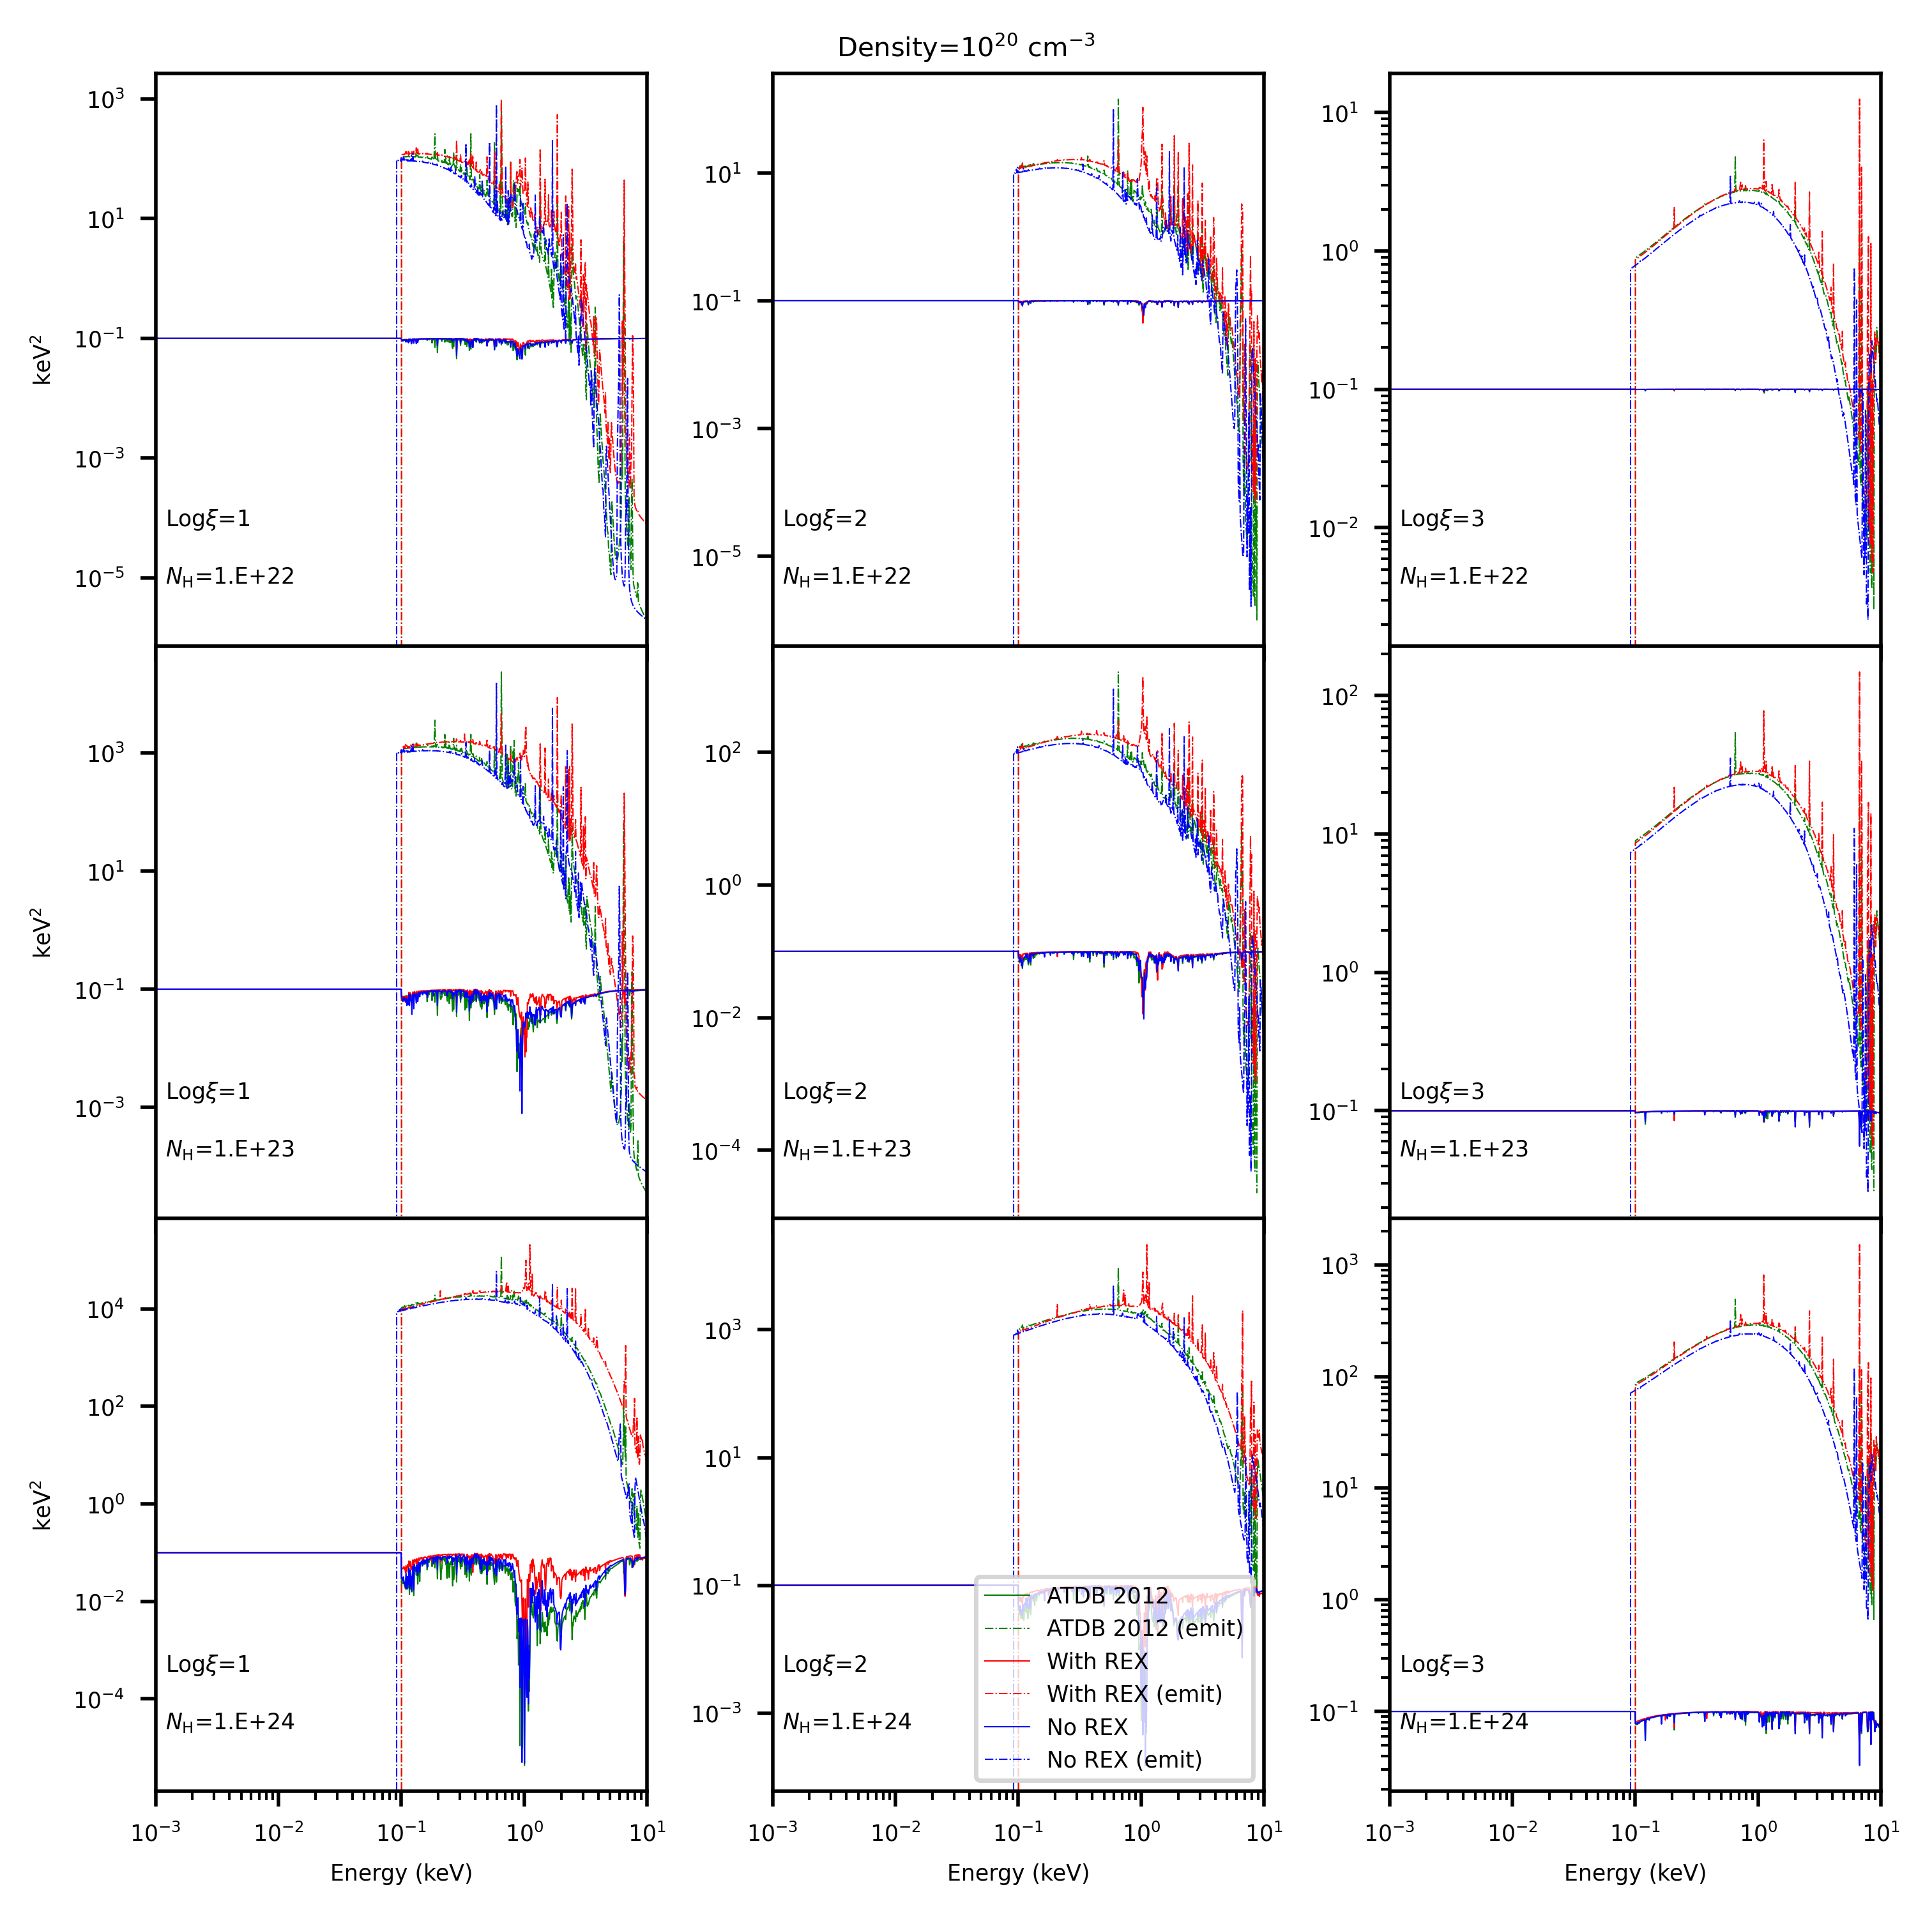

In [171]:
#for pdensity in dselect:
pdensity="20"
densind=np.argwhere(np.array(HDCLdata['density'])=='%s'%pdensity).flatten()
print(densind)
offset=np.min(densind)
respath="/disk/bifrost/yuanze/my_work/xstar"
numcol=len(cselect)
numxi=len(xselect)
fig=plt.figure(figsize=(2*numcol,2*numxi),dpi=500)
gs = fig.add_gridspec(numcol,numxi,hspace=0)
axs=gs.subplots(sharex=True)

plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})
#plt.style.use(["science"])
for i,column in enumerate(cselect):
    for j,logxi in enumerate(xselect):
        energyorg=np.array(orgdata['energy'][offset+numxi*i+j])
        energyHD=np.array(HDdata['energy'][offset+numxi*i+j])
        energyHDCL=np.array(HDCLdata['energy'][offset+numxi*i+j])
        axs[i,j].plot(energyorg,np.array(orgdata['transmit'][offset+numxi*i+j]),"g-",alpha=1,lw=0.3,label="ATDB 2012")
        axs[i,j].plot(energyorg,np.array(orgdata['emit'][offset+numxi*i+j]),"g-.",alpha=1,lw=0.3,label="ATDB 2012 (emit)")
        axs[i,j].plot(energyHD,np.array(HDdata['transmit'][offset+numxi*i+j]),"r-",alpha=1,lw=0.3,label="With REX")
        axs[i,j].plot(energyHD,np.array(HDdata['emit'][offset+numxi*i+j]),"r-.",alpha=1,lw=0.3,label="With REX (emit)")
        axs[i,j].plot(energyHDCL,np.array(HDCLdata['transmit'][offset+numxi*i+j]),"b-",alpha=1,lw=0.3,label="No REX")
        axs[i,j].plot(energyHDCL,np.array(HDCLdata['emit'][offset+numxi*i+j]),"b-.",alpha=1,lw=0.3,label="No REX (emit)")
        axs[i,j].set_yscale("log")
        axs[i,j].set_xscale("log")

        axs[i,j].text(0.02, 0.1,r"$N_\mathrm{H}$=%s"%HDdata['column'][offset+numxi*i+j],transform=axs[i,j].transAxes,verticalalignment='bottom',horizontalalignment='left')
        axs[i,j].text(0.02, 0.2,r"Log$\xi$=%s"%HDdata['logxi'][offset+numxi*i+j],transform=axs[i,j].transAxes,verticalalignment='bottom',horizontalalignment='left')
        #axs[i,j].set_ylim([1e-24,1])
        axs[i,j].set_xlim([1e-3,10])
        #print(np.min(transmit[-1]))
        #axs[i,j].set_yticks([1,1e5,1e10,1e15])
        #axs[i,j].set_yticklabels(["1","10$^{5}$","10$^{10}$","10$^{15}$"])
        #axs[i,j].legend(loc="lower right")
        axs[-1,j].set_xlabel("Energy (keV)")
    axs[i,0].set_ylabel(r"keV$^2$")
    fig.suptitle(r"Density=10$^{%s}$ cm$^{-3}$"%pdensity)
axs[numxi-1,int(numcol/2)].legend(loc="lower right")
fig.tight_layout()
fig.savefig(respath+"/newCOMPn{0}.png".format(pdensity))

#n20 temperature result
#HD:logxi=2 Nh=1e24: logt=6.36-6.90
#HD+CL:logxi=2 Nh=1e24: logt=5.89-6.92

#n22 temperature result
#HD:logxi=1, Nh=1e24: logt=6.88-7.50
#HD+CL:logxi=1, Nh=1e24: logt=6.82-7.50

#HD:logxi=2, Nh=1e24: logt=7.40-7.50
#HD+CL:logxi=2, Nh=1e24: logt=7.38-7.51

 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
Parameter delta values for fits will now be 0.01 * parValue
 Model systematic error set to 0

Model diskbb<1> + powerlaw<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   diskbb     Tin        keV      0.232377     +/-  0.0          
   2    1   diskbb     norm                5.43060E+04  +/-  0.0          
   3    2   powerlaw   PhoIndex            1.68691      +/-  0.0          
   4    2   powerlaw   norm                0.671689     +/-  0.0          
________________________________________________________________________


***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/test_mo2.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tc

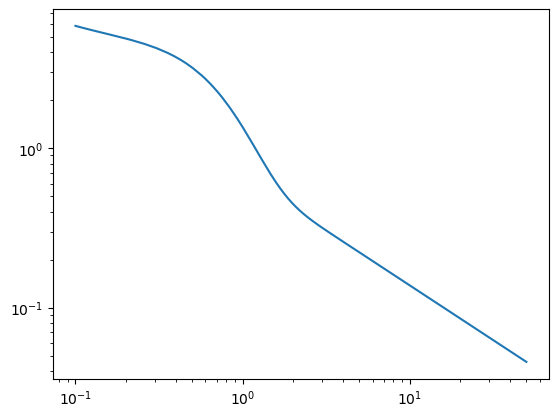

In [10]:
from xspec import *
import numpy as np
import matplotlib.pyplot as plt
Xset.restore("/disk/bifrost/yuanze/test_mo2.xcm")
Plot.xAxis="keV"
Plot("emodel")
plt.plot(Plot.x(),Plot.model())
plt.yscale("log")
plt.xscale("log")

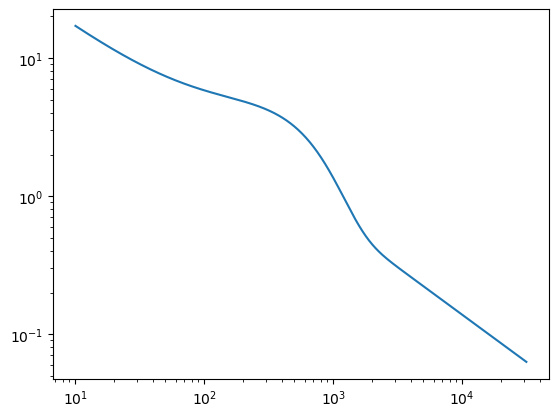

In [29]:
ener=np.loadtxt("/disk/bifrost/yuanze/shinainp.txt",usecols=0)
flux=np.loadtxt("/disk/bifrost/yuanze/shinainp.txt",usecols=2)
plt.plot(ener[0:700]*1000,flux[0:700])
plt.yscale("log")
plt.xscale("log")
np.savetxt("/disk/bifrost/yuanze/xstar_tab/shina.txt",np.array([ener[0:700]*1000,flux[0:700]]).T)

In [206]:
a=np.float64('0.00000000E+00')
print(a)

0.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
from os.path import join
density=18
logxi=3
datype="n{}_logxi_{}".format(density,logxi)
rpath="/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2/"+datype+"_t"
rpatho="/disk/bifrost/yuanze/xillver_res/ktbb1/"+datype+"_bin5000_t"

def convert_fortran_number(s):
    s = s.decode("utf-8")  # Needed if Python 3.x, skip this line if Python 2.x
    if re.search(r'(?<![Ee])[-+]', s):
        s = re.sub(r'(\d)-(\d)', r'\1E-\2', s)  # Replace '-' with 'E-' if it follows a digit
        s = re.sub(r'(\d)\+(\d)', r'\1E+\2', s)  # Replace '+' with 'E+' if it follows a digit
    return float(s)

aphlist=[]
aphlisto=[]
diff=[]
diffR=[]
diffopakcR=[]
diffemisR=[]
opakclist=[]
opakclisto=[]
cemxlist=[]
cemxlisto=[]
bN=5000
trunc=1300
depth=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=200,skiprows=0)
specE=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN-trunc,skiprows=0)
for zone in np.arange(0,199):
    skip=(bN+2)*zone
    #aphlist.append(np.loadtxt(join(rpath,"current/fullspec"),usecols=2,converters={7: convert_fortran_number},max_rows=bN-trunc,skiprows=skip+1))
    opakclist.append(np.loadtxt(join(rpath,"current/fullspec"),usecols=4,max_rows=bN-trunc,skiprows=skip+1))
    cemxlist.append(np.loadtxt(join(rpath,"current/fullspec"),usecols=7,converters={7: convert_fortran_number},max_rows=bN-trunc,skiprows=skip+1))
    #aphlisto.append(np.loadtxt(join(rpatho,"current/fullspec"),usecols=2,converters={7: convert_fortran_number},max_rows=bN-trunc,skiprows=skip+1))
    opakclisto.append(np.loadtxt(join(rpatho,"current/fullspec"),usecols=4,max_rows=bN-trunc,skiprows=skip+1))
    cemxlisto.append(np.loadtxt(join(rpatho,"current/fullspec"),usecols=7,converters={7: convert_fortran_number},max_rows=bN-trunc,skiprows=skip+1))
    #diff.append(np.sum(np.abs(aphlist[-1]-aphlisto[-1])/(aphlist[-1]+aphlisto[-1])))
    #diffR.append(aphlist[-1]/aphlisto[-1])
    diffopakcR.append(opakclist[-1]/opakclisto[-1])
    diffemisR.append(cemxlist[-1]/cemxlisto[-1])
#axs.plot(specE1,foutE1*Earray,"C1",label=r"XILLVER 3.4b",ms=1,lw=0.5)
#axs.plot(specE1,fionizE1*Earray,"m",label=r"F$_{ionize}$",ms=1,lw=0.5,alpha=0.3)
#axs.plot(specE1,bbev(specE1,temp1[layer])*Earray,color='C1',alpha=0.3)



/tmp/ipykernel_1036360/4247623953.py:43: RuntimeWarning: invalid value encountered in divide
  diffemisR.append(cemxlist[-1]/cemxlisto[-1])
/tmp/ipykernel_1036360/4247623953.py:43: RuntimeWarning: divide by zero encountered in divide
  diffemisR.append(cemxlist[-1]/cemxlisto[-1])


Text(0, 0.5, 'Opacity')

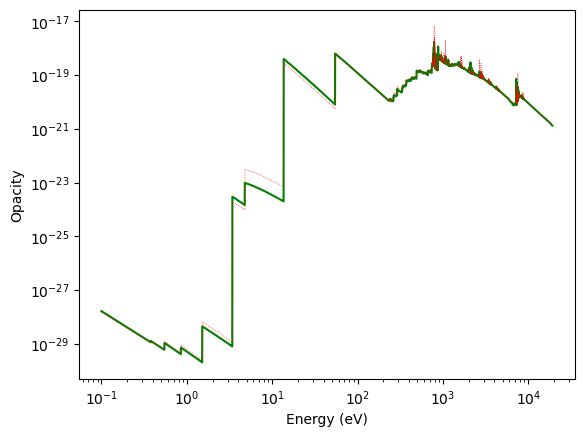

In [56]:
plt.plot(specE,opakclist[1],'g')
plt.plot(specE,opakclisto[1],':r',lw=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Energy (eV)")
plt.ylabel("Opacity")

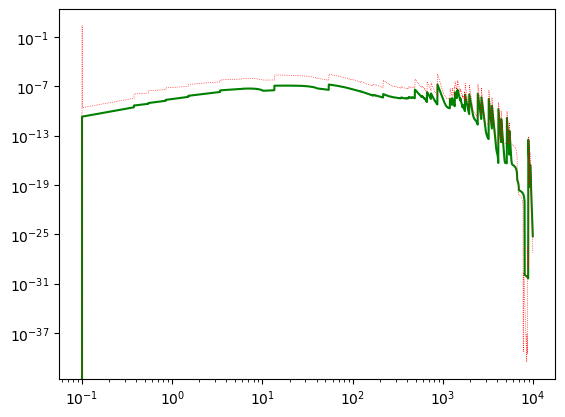

In [31]:
plt.plot(specE,cemxlist[1],'g')
plt.plot(specE,cemxlisto[1],':r',lw=0.5)
plt.xscale('log')
plt.yscale('log')

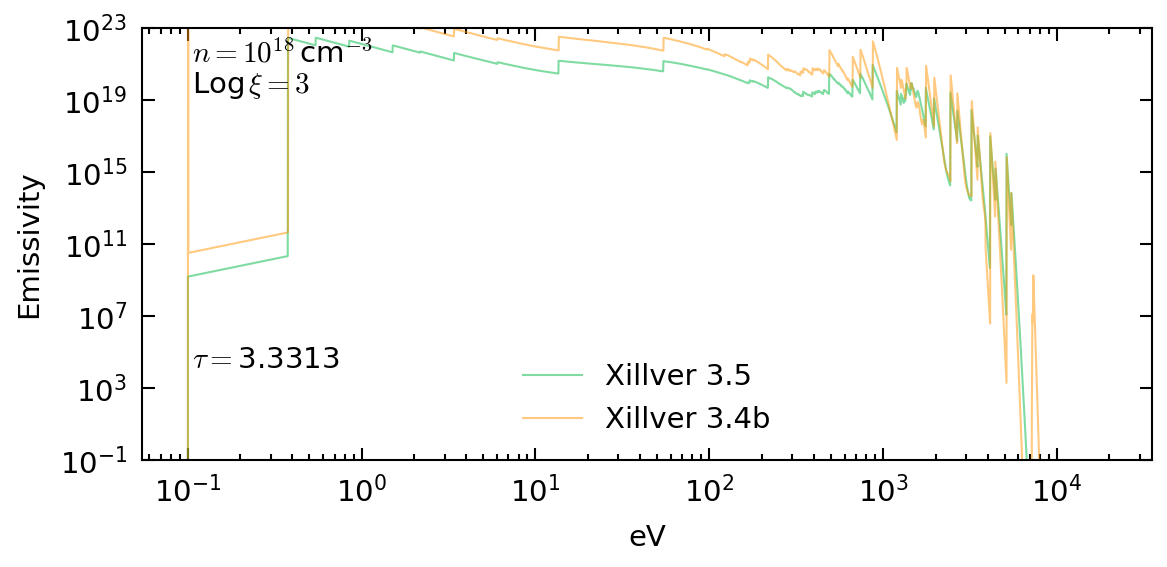

In [4]:
specEE=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN-trunc,skiprows=0)
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

fig.clear()
'''
for zone in np.arange(0,180,10):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specEE,cemxlist[zone],"C1",ms=1,lw=0.5,alpha=0.5,label="Xillver 3.5")
    axs.plot(specEE,cemxlisto[zone],"C2",ms=1,lw=0.5,alpha=0.5,label="Xillver 3.4b")
 #    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Emissivity")
    axs.legend()
    #axs.set_ylim([1e-1,1e30])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./rccemis/emis_zone%d"%zone)
    plt.close()
'''
for zone in np.arange(180,181):
    fig=plt.figure(figsize=(4,2),dpi=300)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specEE,cemxlist[zone],"C1",ms=1,lw=0.5,alpha=0.5,label="Xillver 3.5")
    axs.plot(specEE,cemxlisto[zone],"C2",ms=1,lw=0.5,alpha=0.5,label="Xillver 3.4b")
#    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Emissivity")
    axs.legend()
    axs.set_ylim([1e-1,1e23])
    #axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05,0.92,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs.transAxes)
    axs.text(0.05,0.85,r"Log$\,\xi=%d $"%logxi,transform=axs.transAxes)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left')
    fig.tight_layout()
    fig.savefig("./rccemis/emis_zone%d"%zone)
#    plt.close()


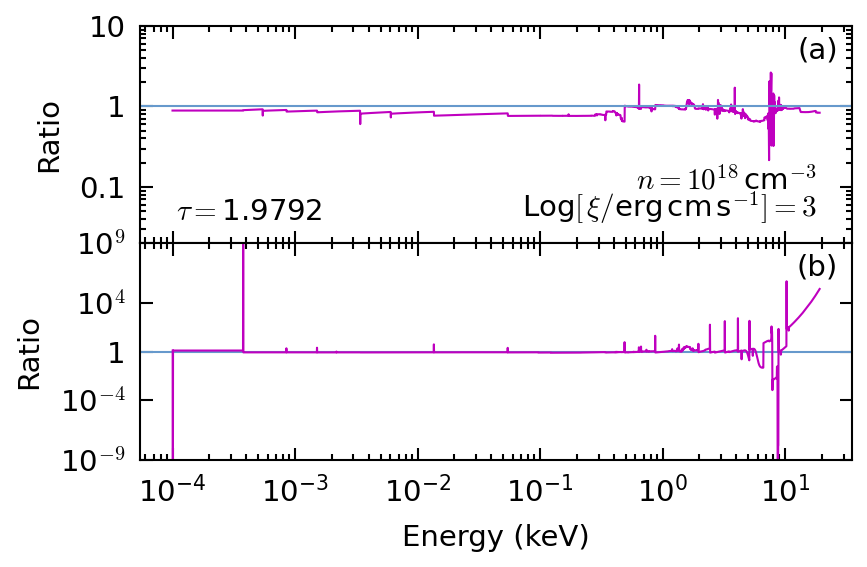

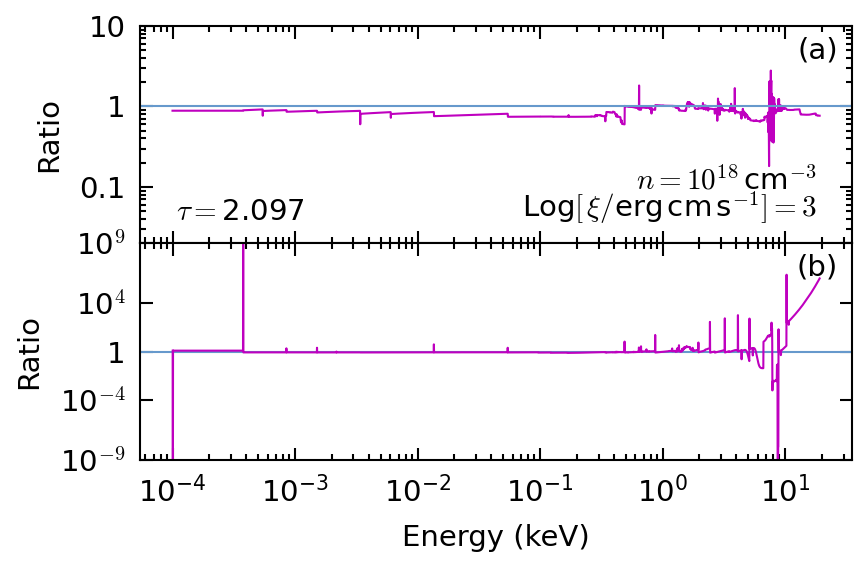

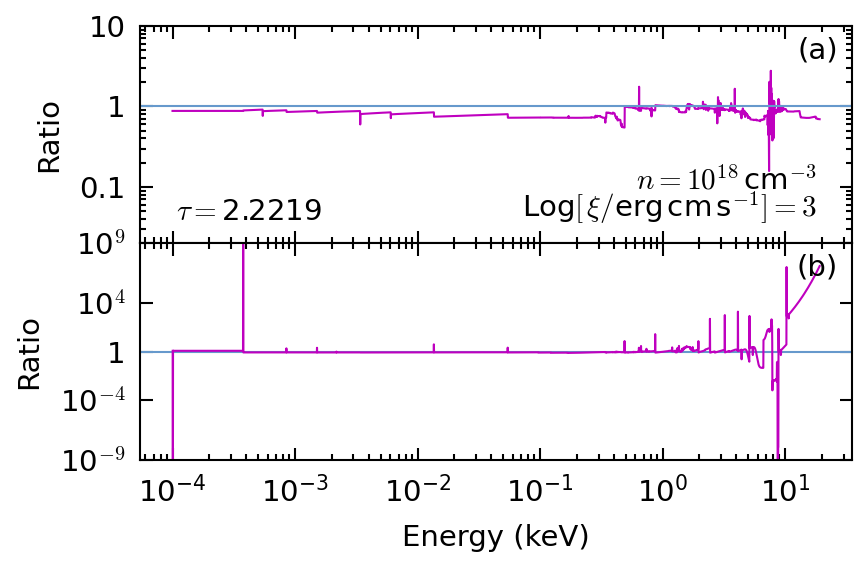

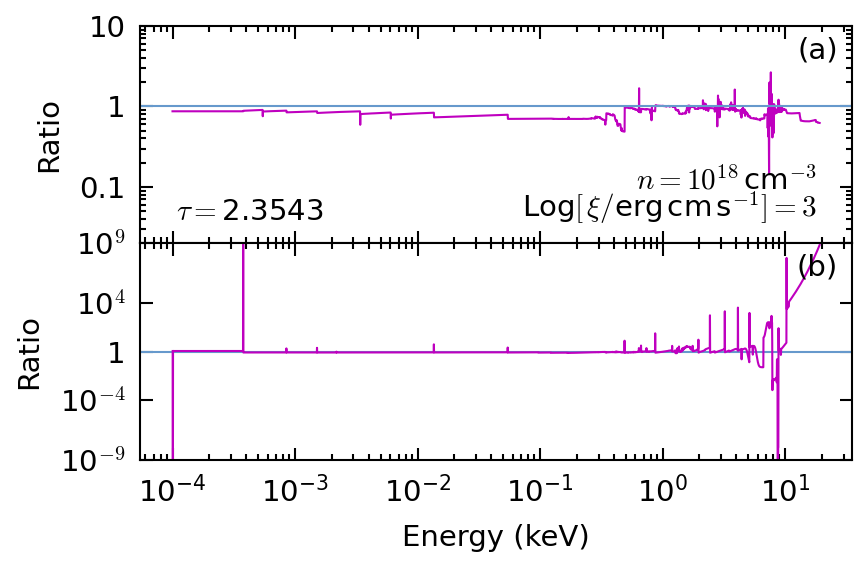

In [6]:
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

for zone in np.arange(171,175):
    fig=plt.figure(figsize=(3,2),dpi=300)
    gs = fig.add_gridspec(2,1,hspace=0)
    axs=gs.subplots(sharex=True)
    axs[0].plot(specEE/1000,diffopakcR[zone],"m",ms=1,lw=0.5,alpha=1.0,label="Xillver 3.5")
    axs[0].axhline(1,c="#6699CC",lw=0.5,alpha=1)
    axs[1].axhline(1,c="#6699CC",lw=0.5,alpha=1)
#    axs.plot(specEE,opakclisto[zone],"C2",ms=1,lw=0.5,alpha=0.5,label="Xillver 3.4b")
#    axs.axhline(1,lw=0.5)
    axs[0].set_xscale("log")
    axs[0].set_yscale("log")
#    axs.set_xlabel("Energy (keV)")
    axs[0].set_ylabel("Ratio")
#    axs.legend()
    axs[0].set_ylim([0.02,10])
    axs[0].set_yticks([0.1,1,10])
    axs[0].set_yticklabels(["0.1","1","10"])
    #axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    
    axs[0].text(0.95, 0.22,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='right')
    axs[0].text(0.95, 0.08,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='right')
    
    axs[0].text(0.05, 0.08,r"$\tau=${}".format(depth[zone]),transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left')
    axs[0].text(0.98, 0.95,r"(a)",transform=axs[0].transAxes,verticalalignment='top',horizontalalignment='right')
    axs[1].text(0.98, 0.95,r"(b)",transform=axs[1].transAxes,verticalalignment='top',horizontalalignment='right')
#    fig.tight_layout()
#    fig.savefig("./pub2/zones/opakc_zone%d"%zone)
#    plt.close()
#    fig=plt.figure(figsize=(4,2),dpi=300)
#    gs = fig.add_gridspec(1,1)
#    axs=gs.subplots()
    axs[1].plot(specEE/1000,diffemisR[zone]*np.pi*4,"m",ms=1,lw=0.5,alpha=1.0,label="Xillver 3.5")
    #axs.plot(specEE,cemxlisto[zone],"C2",ms=1,lw=0.5,alpha=0.5,label="Xillver 3.4b")
#    axs.axhline(1,lw=0.5)
 #   axs.set_xscale("log")
    axs[1].set_yscale("log")
    axs[1].set_xlabel("Energy (keV)")
    axs[1].set_ylabel("Ratio")
 #   axs.legend()
    axs[1].set_ylim([1e-9,1e9])
    axs[1].set_yticks([1e-9,1e-4,1,1e4,1e9])
    axs[1].set_yticklabels(["10$^{-9}$","10$^{-4}$","1","10$^{4}$","10$^{9}$"])
    #axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#    axs.text(0.05,0.92,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs.transAxes)
#    axs.text(0.05,0.85,r"Log$\,\xi=%d $"%logxi,transform=axs.transAxes)
#    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left')
    fig.tight_layout()
    fig.savefig("./pub2/zones/ratio_zone%d.pdf"%zone)
#    plt.close()


In [39]:
specEE=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN-trunc,skiprows=0)

#fig.clear()
for zone in np.arange(0,180,10):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specEE,diffemisR[zone],"C2",ms=1,lw=0.5,alpha=0.5)
    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Ratio")
    axs.set_ylim([1e-7,1000])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./ratio_emis/ratio_zone%d"%zone)
    plt.close()

for zone in np.arange(180,199):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specEE,diffemisR[zone],"C2",ms=1,lw=0.5,alpha=0.5)
    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Ratio")
    axs.set_ylim([1e-7,1000])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./ratio_emis/ratio_zone%d"%zone)
    plt.close()


In [40]:
specEE=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN-trunc,skiprows=0)

fig.clear()
for zone in np.arange(0,180,10):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specEE,diffemisR[zone],"C2",ms=1,lw=0.5,alpha=0.5)
    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Ratio")
    axs.set_ylim([1e-7,1000])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./ratio_rccemis/ratio_zone%d"%zone)
    plt.close()

for zone in np.arange(180,199):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specEE,diffemisR[zone],"C2",ms=1,lw=0.5,alpha=0.5)
    axs.axhline(12.56,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Ratio")
    axs.set_ylim([1e-7,1000])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./ratio_rccemis/ratio_zone%d"%zone)
    plt.close()


In [47]:
1/diffemisR[0][300:699]

array([12.39169111, 12.39169511, 12.39169929, 12.39170284, 12.39170746,
       12.39171168, 12.39171619, 12.39171953, 12.39172404, 12.39172826,
       12.39173287, 12.3917371 , 12.39174113, 12.39174626, 12.39175046,
       12.39175439, 12.39175934, 12.39176269, 12.39176771, 12.39177181,
       12.39177625, 12.3917809 , 12.39178518, 12.39178958, 12.39179427,
       12.39179839, 12.39180387, 12.39180811, 12.39181217, 12.39181694,
       12.39182143, 12.39182569, 12.39183086, 12.3918357 , 12.39183997,
       12.39184439, 12.3918494 , 12.39185421, 12.39185883, 12.39186372,
       12.39186821, 12.39187328, 12.39187776, 12.3918826 , 12.39188781,
       12.39189253, 12.39189679, 12.39190202, 12.39190709, 12.39191117,
       12.39191702, 12.39192168, 12.39192656, 12.39193118, 12.39193631,
       12.39194124, 12.39194648, 12.39195169, 12.39195632, 12.39196169,
       12.39196665, 12.39197205, 12.39197709, 12.39198216, 12.39198717,
       12.39199227, 12.39199747, 12.39200291, 12.39200785, 12.39

In [41]:
fig.clear()
for zone in np.arange(0,180,10):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specE,diffopakcR[zone],"C2",ms=1,lw=0.5,alpha=0.5)
    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Ratio")
    axs.set_ylim([1e-7,1000])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./ratio_opakc/ratio_zone%d"%zone)
    plt.close()

for zone in np.arange(180,199):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specE,diffopakcR[zone],"C2",ms=1,lw=0.5,alpha=0.5)
    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Ratio")
    axs.set_ylim([1e-7,1000])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./ratio_opakc/ratio_zone%d"%zone)
    plt.close()


In [223]:
fig.clear()
for zone in np.arange(0,180,10):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specE,diffR[zone],"C2",ms=1,lw=0.5,alpha=0.5)
    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Ratio")
    axs.set_ylim([1e-7,1000])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./ratio_test/ratio_zone%d"%zone)
    plt.close()

for zone in np.arange(180,199):
    fig=plt.figure(figsize=(4,2),dpi=500)
    gs = fig.add_gridspec(1,1)
    axs=gs.subplots()
    axs.plot(specE,diffR[zone],"C2",ms=1,lw=0.5,alpha=0.5)
    axs.axhline(1,lw=0.5)
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_xlabel("eV")
    axs.set_ylabel("Ratio")
    axs.set_ylim([1e-7,1000])
    axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    axs.text(0.05, 0.2,r"$\tau=${}".format(depth[zone]),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
    fig.savefig("./ratio_test/ratio_zone%d"%zone)
    plt.close()


Text(0.5, 0, 'Thomson Depth')

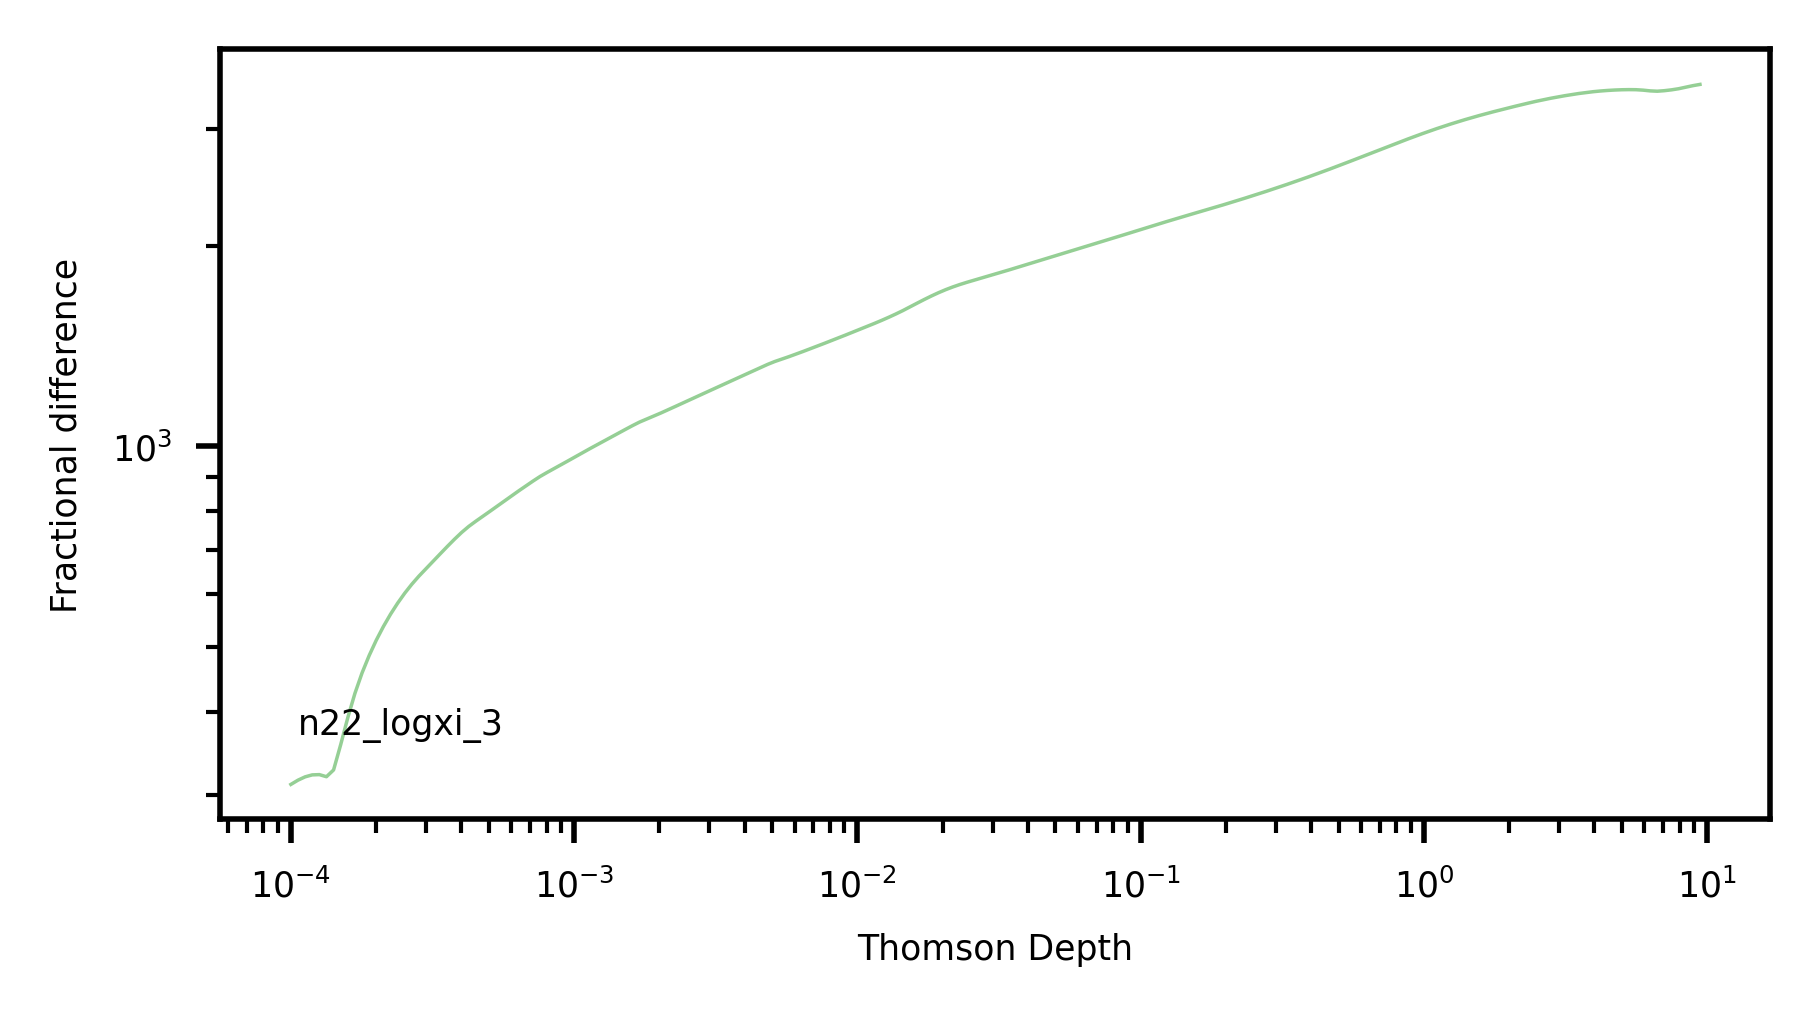

In [141]:
fig=plt.figure(figsize=(4,2),dpi=500)
gs = fig.add_gridspec(1,1)
axs=gs.subplots()

axs.plot(depth[:199],diff,"C2",ms=1,lw=0.5,alpha=0.5)
axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)

axs.set_xscale("log")
axs.set_yscale("log")
axs.set_ylabel("Fractional difference")
axs.set_xlabel("Thomson Depth")

Text(0.5, 0, 'Thomson Depth')

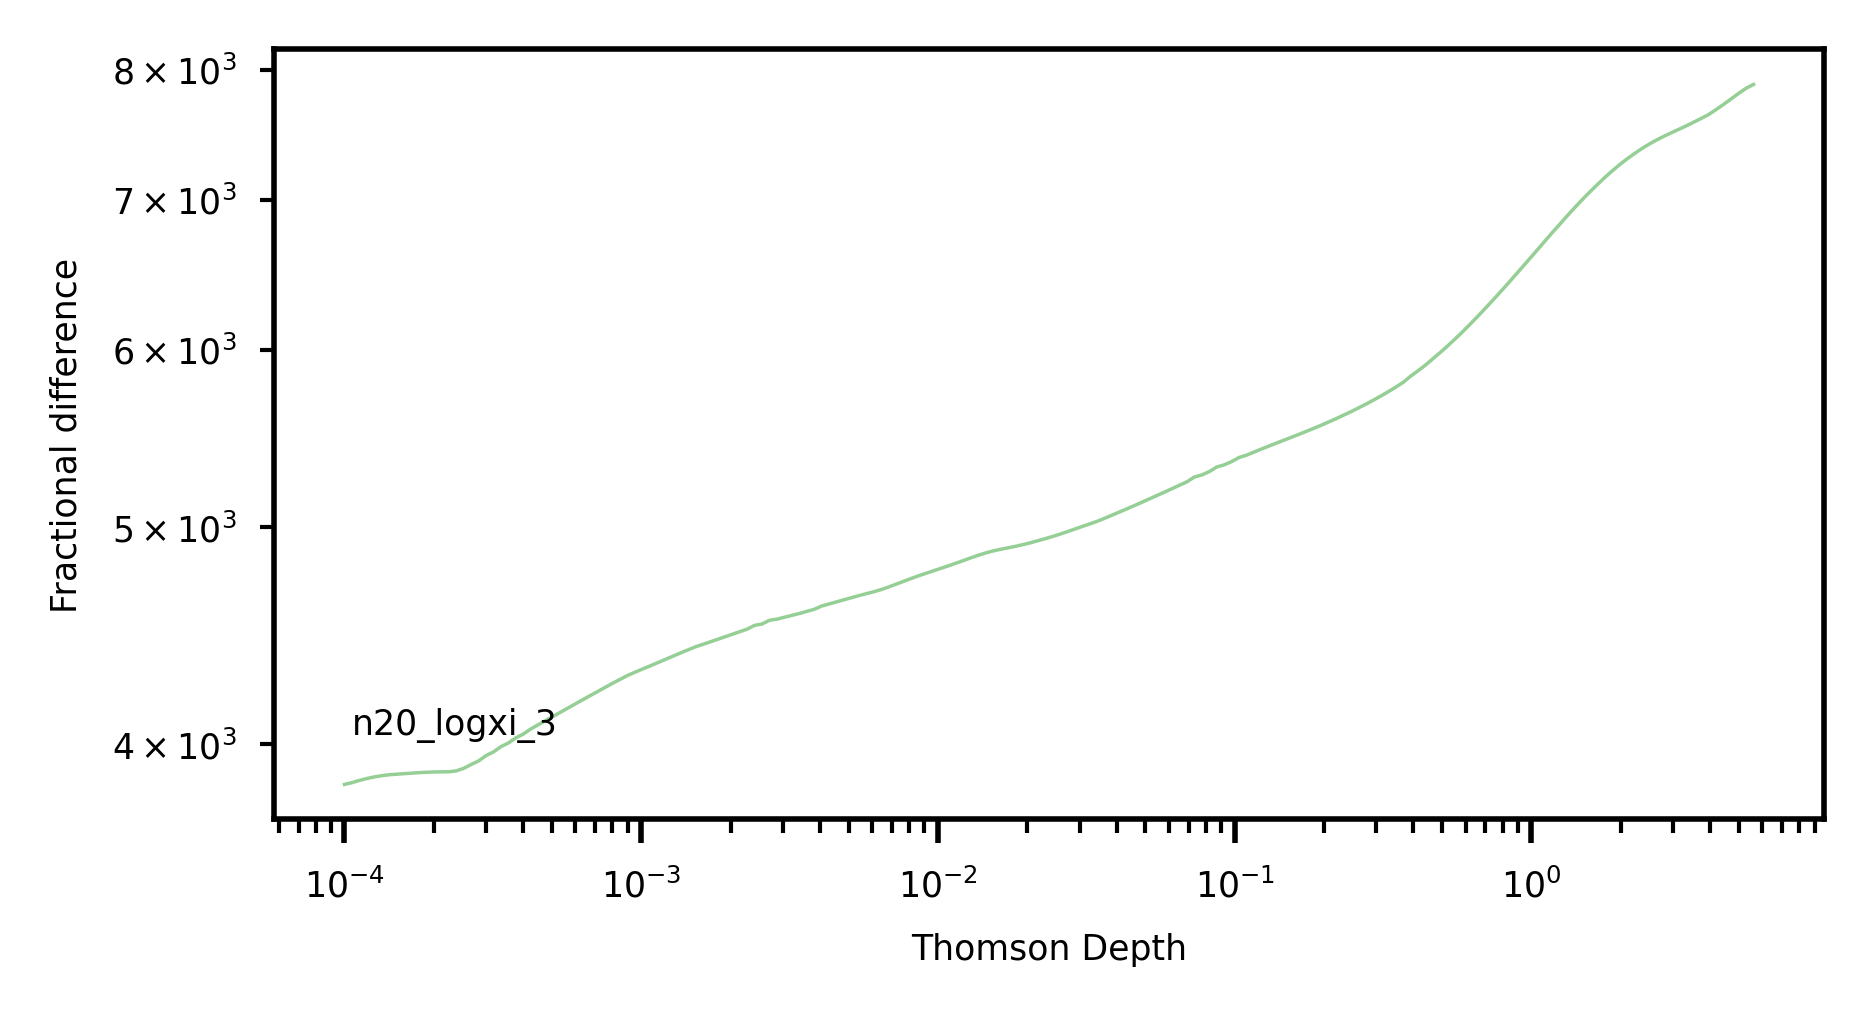

In [86]:
fig=plt.figure(figsize=(4,2),dpi=500)
gs = fig.add_gridspec(1,1)
axs=gs.subplots()

axs.plot(depth[0:190],diff,"C2",ms=1,lw=0.5,alpha=0.5)
axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)

axs.set_xscale("log")
axs.set_yscale("log")
axs.set_ylabel("Fractional difference")
axs.set_xlabel("Thomson Depth")

In [179]:
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits


respath="/disk/bifrost/yuanze/xstar_tab/stable/xstar_comp"

dselect=np.array([20,22])
energyHDCL=[]
#emit_out=[]
transmitHDCL=[]
energyHD=[]
transmitHD=[]

for i,dens in enumerate(dselect):
    hdu1=pyfits.open(respath+"/n%d_cfrac0/000006/xout_spect1.fits"%dens)
    hdu2=pyfits.open(respath+"/n%d_cfrac0_atdb12/000006/xout_spect1.fits"%dens)
    energyHDCL.append(hdu1[2].data["energy"])
    #emit_out.append(hdu[2].data["emit_outward"])
    transmitHDCL.append(hdu1[2].data["emit_outward"])
    energyHD.append(hdu2[2].data["energy"])
    #emit_out.append(hdu[2].data["emit_outward"])
    transmitHD.append(hdu2[2].data["emit_outward"])

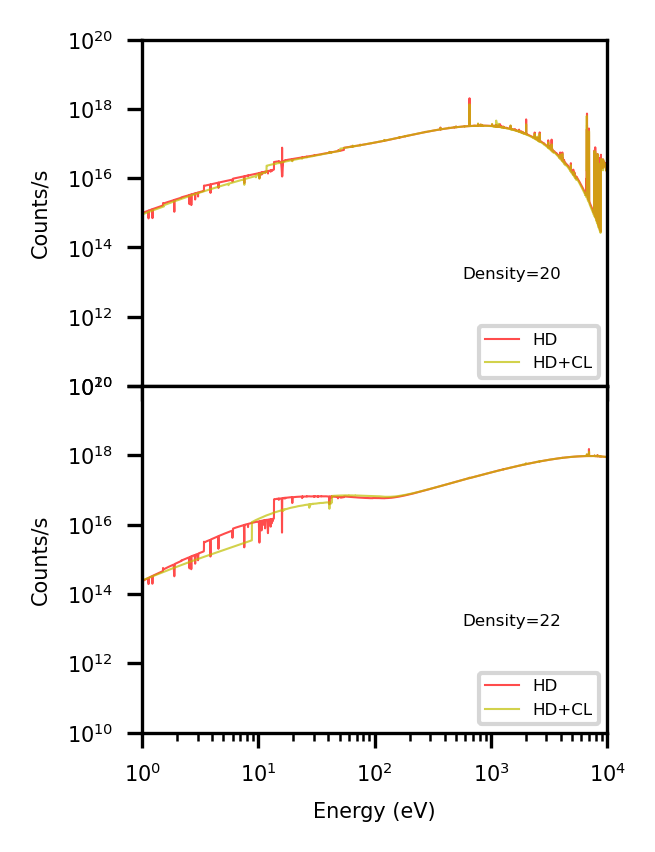

In [185]:
fig=plt.figure(figsize=(2,3),dpi=300)
gs = fig.add_gridspec(2, hspace=0)
axs=gs.subplots(sharex=True)
for i,dens in enumerate(dselect):
    axs[i].plot(energyHD[i],energyHD[i]*transmitHD[i],"r-",alpha=0.7,lw=0.5,label="HD")
    axs[i].plot(energyHDCL[i],energyHDCL[i]*transmitHDCL[i],"y-",alpha=0.7,lw=0.5,label="HD+CL")
    
    axs[i].set_yscale("log")
    axs[i].set_xscale("log")
    axs[i].set_xlabel("Energy (eV)")
    axs[i].set_ylabel("Counts/s")
    plt.text(0.9, 0.3,"Density=%d"%dens,transform=axs[i].transAxes,verticalalignment='bottom',horizontalalignment='right',fontsize=4)
    axs[i].set_ylim([1e10,1e20])
    axs[i].set_xlim([1,1e4])
    #print(np.min(transmit[-1]))
    #axs[i].set_yticks([1e3,1e5,1e10,1e15])
    #axs[i].set_yticklabels(["10$^{3}$","10$^{5}$","10$^{10}$","10$^{15}$"],fontsize=3)
    axs[i].legend(loc="lower right",fontsize=4)

#fig.savefig(respath+"/fig/transHDCL.png",dpi=300)